In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Compression: JPEG

In this task, we will explore the effect of JPEG compression. You do not need to write the algorithm for JPEG compression. We will simply use the inbuilt `cv2.imwrite` function and will vary the Q value for JPEG compression. Note that here Q value is the quality.

To save the image at a quality = 50, use `cv2.imwrite('filename.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])`. 

Use the provided function `get_file_size()` to find the size of the file in KB. for eg: `get_file_size('filename.jpeg')`

### Your task
1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
3. Apply an average filter of 5 x 5 on original image >> save at Q = 80

After you do the above three operations on the original image. Compare the size of the saved image. Is there’s any change, Yes/ No? If Yes, try to explain why? Write your explanation in your observations.

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-7ienvj60
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2313 sha256=8d05b769da6ad004c9b8cac299ab39a46dd45976519209e12ef60082ec921abb
  Stored in directory: /tmp/pip-ephem-wheel-cache-joaj63av/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-7ienvj60


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage

def get_file_size(file_dir):
    b = os.path.getsize(file_dir)
    return round(b/1000, 1)

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=4, task_no=1) # download data for this assignment

Download Complete!


In [ ]:
def jpeg_playground(img):
    '''
    Inside this function do the task as described above, i.e.
      1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
      2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
      3. Apply an average filter of 5 x 5 on original image >> save at Q = 80
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + Orig_img - Original image after compressing at Q = 80
    + Orig_size - Size of the saved image of Orig_img at Q = 80
    
    + UD_img - Image obtained after upsampling and downsampling
    + UD_size - Size of the saved image of UD_img at Q = 80
    
    + DU_img - Image obtained after downsampling and upsampling
    + DU_size - Size of the saved image of DU_img at Q = 80
    
    + Smooth_img - Image obtained after smoothing using average filter
    + Smooth_size - Size of the saved image of Smooth_img at Q = 80
    
    Allowed external package:
    + Any relevant module in openCV
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    Orig_img = img
    cv2.imwrite('Orig_img.jpeg', Orig_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Orig_size = get_file_size('Orig_img.jpeg')

    U_img = cv2.resize(img, None, fx=2, fy=2)
    UD_img = cv2.resize(U_img, None, fx=0.5, fy=0.5)
    cv2.imwrite('UD_img.jpeg', UD_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    UD_size = get_file_size('UD_img.jpeg')

    D_img = cv2.resize(img, None, fx=0.5, fy=0.5)
    DU_img = cv2.resize(D_img, None, fx=2, fy=2)
    cv2.imwrite('DU_img.jpeg', DU_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    DU_size = get_file_size('DU_img.jpeg')

    Smooth_img = cv2.blur(img, (5, 5))
    cv2.imwrite('Smooth_img.jpeg', Smooth_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Smooth_size = get_file_size('Smooth_img.jpeg')

    
    #############################
    # End your code here ########
    #############################   
    
    return Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size

### Observations

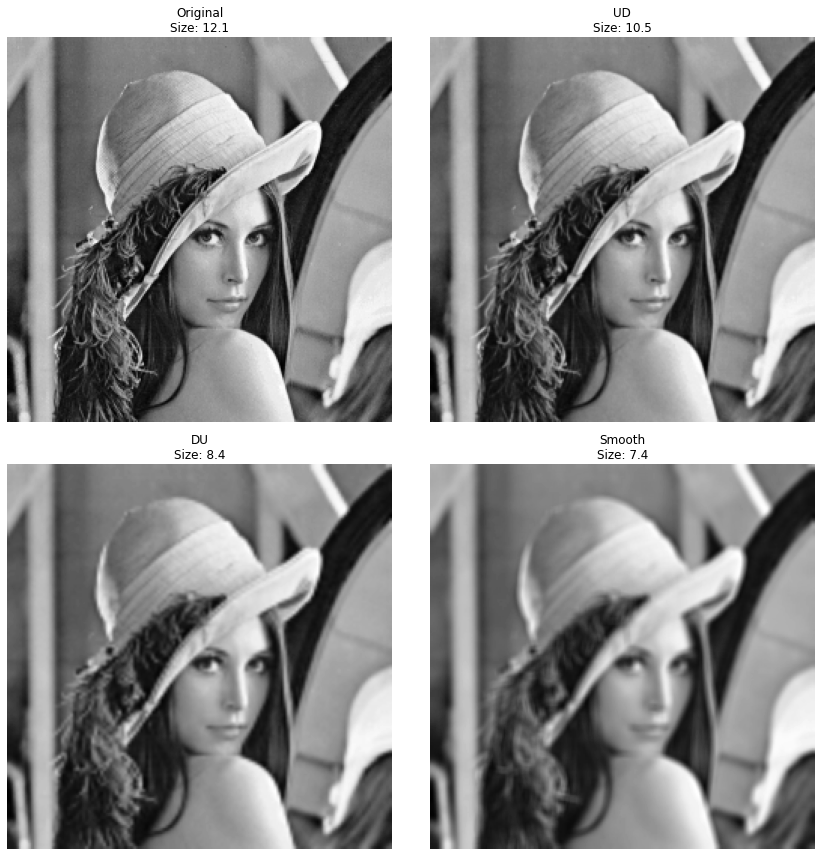

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the images vs the size of the jpeg compression on different operations

img = cv2.imread("data/lena_gray.jpg", 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)

Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size = jpeg_playground(img)

fig = plt.figure(figsize=(12, 12))
plot_frame(2, 2, 0, Orig_img, "Original\nSize: " + str(Orig_size))
plot_frame(2, 2, 1, UD_img, "UD\nSize: " + str(UD_size))
plot_frame(2, 2, 2, DU_img, "DU\nSize: " + str(DU_size))
plot_frame(2, 2, 3, Smooth_img, "Smooth\nSize: " + str(Smooth_size))
fig.tight_layout()
plt.show()

In [2]:
your_observation = """
Yes, there is a change from the original image size.

Order of file sizes: Original > UD > DU > Smooth

UD: Here the image is upsampled and then downsampled. Even though the size increases after upsampling, there is a loss of data (especially in areas with fine detail) in the downsampling step which makes 
the image slightly smaller in size. However this loss is minimal compared to the other cases and that is why this image is visually closest to the original.

DU: Here the downsampling loss occurs in the beginning itself, so there is a loss of data. Image quality is much worse than UD and file size is also lesser.
Smooth: Again there is a loss of data because of the averaging filter. This also has the worst image quality, and least file size.
"""

print(your_observation)


Yes, there is a change from the original image size.

Order of file sizes: Original > UD > DU > Smooth

UD: Here the image is upsampled and then downsampled. Even though the size increases after upsampling, there is a loss of data (especially in areas with fine detail) in the downsampling step which makes 
the image slightly smaller in size. However this loss is minimal compared to the other cases and that is why this image is visually closest to the original.

DU: Here the downsampling loss occurs in the beginning itself, so there is a loss of data. Image quality is much worse than UD and file size is also lesser.
Smooth: Again there is a loss of data because of the averaging filter. This also has the worst image quality, and least file size.

